In [19]:
import os
import pandas as pd
import json
from pylab import *

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

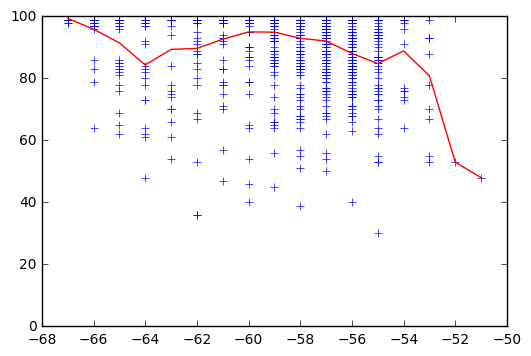

In [59]:
#=============================== defines ======================================

RAW_PATH = "../raw"
OUT_PATH = "../processed"

#=============================== main =========================================

    
# load the dataset

df = pd.read_csv("/home/keoma/Documents/openwsn/mercator/datasets/raw/strasbourg.csv")
#df = pd.read_csv("/home/keoma/Documents/openwsn/lille.csv")

# select emitters

df.drop_duplicates(inplace=True)
df = df[(df.crc == 1) & (df.expected == 1)]
list_emitters = df["srcmac"].drop_duplicates().tolist()


node_count = len(df.groupby(df["mac"]))

transaction = df.groupby([df["transctr"], df["srcmac"]])

list_rssi = []
list_pdr = []
list_mean = []
list_std = []

for name, group in transaction:
    mean_rssi = group["rssi"].mean().round().tolist()
    rx_count = len(group)
    tx_count = df["txnumpk"].iloc[0]
    pdr = (rx_count * 100) / ((node_count - 1) * tx_count)
    list_pdr.append(pdr)
    list_rssi.append(mean_rssi)

ser = pd.DataFrame(data={"rssi": list_rssi, "pdr": list_pdr})
groupe = ser.groupby(ser["rssi"])
list_mean = groupe["pdr"].mean()

x = np.array(list_rssi)
y = np.array(list_pdr)
e = np.array(list_std)

plt.figure()
axes = plt.gca()
axes.set_ylim([0,100])
plot(x, y, '+')
plot(list_mean.index, list_mean.values, 'r')